# Проект по приоритизации гипотез и проведению A/B тестирования
**Контекст**: в данном проекте мы выступаем в качестве аналитика в крупном интернет магазине.  

**Цель работы**: увеличить прибыль интернет магазина.  

**Задачи**:
В ходе проекта мы столкнёмся с решением двух независимых задач:
1) Отделом маркетинга было разработано девять гипотез по увеличению прибыли, однако в виду ограниченности ресурсов нет возможности проверить их все. В связи с чем требуется приотиризировать предложенные гипотезы и выбрать наиболее перспективную.   
2) Проанализировать результаты А/B тестирования, сделать выводы, дать рекомендации и принять обоснованное решение о приостановке либо продолжении тестирования.


## Оглавление
**[Часть 1. Приоритизация гипотез](#hyp)  
[Часть 2. Анализ A/B-теста](#a_b_test)   
[2.1 Извлечение и предобработка данных](#Data_preprocessing)    
[2.2 Анализ сырых данные А/B теста](#analysis)  
[2.3 Анализ аномалий в данных](#anomaly)  
[2.4 Расчёт статистической значимости по «сырым» данным](#raw_stat)  
[2.5 Расчёт статистической значимости по «очищенным» данным](#filt_stat)  
[Общие выводы](#conclusion)**

# Часть 1. Приоритизация гипотез <a id="hyp"></a> 

In [10]:
import pandas as pd
import scipy.stats as stats
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

In [11]:
try:
    data = pd.read_csv('C:/Users/zvere/Desktop/Яндекс Практикум/Проект 4/hypothesis.csv', sep=',' )
except:
    data = pd.read_csv('/datasets/hypothesis.csv', sep=',')

Ознакомимся с перечнем гипотез и их параметрами

In [12]:
pd.set_option('max_colwidth', None)
data.head(10)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [13]:
data.columns = [x.lower() for x in data.columns]

Применим методы приоритизации гипотез ICE и RICE, после чего сравним результаты

In [14]:
data['ICE'] = ((data['impact'] * data['confidence']) / data['efforts']).round(2)
data[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


Как видно из таблицы, наибольшей рейтинг по методу ICE у гипотез №8, 0, 7. Лидером стала гипотеза о скидке пользователям в их день рождения (но как известно, день рождения только раз в году).

In [15]:
data['RICE'] = (data['reach'] * data['impact'] * data['confidence']) / data['efforts']
data[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


Однако после того, как в расчётную формулу мы добавили параметр "reach", то есть охват аудитории, мы получили иные результаты. Лидером со значительным отрывом стала гипотеза №7 (которая по методу ICE была лишь третей)

<div style="border:solid Gold; padding: 40px">
Исследовав представленные гипотезы двумя методами ICE и RICE, можно сделать вывод, что параметр reach (охват аудитории) значительно влияет на конечный результат. Так как мы имеем представление о предполагаемом охвате той или иной гипотезы, то будем ориентироваться на метод RICE.
    
Наиболее перспективной (с двухкратным отрывом от конкруентов) является гипотеза №7 "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок". Будучи задачей средней сложности по реализумости, её реализация по предварительным данным должна увеличить прибыль компании. 

# Часть 2. Анализ A/B-теста <a id="a_b_test"></a> 

## Извлечение и предобработка данных <a id="Data_preprocessing"></a> 

**Изучим первый датасет**

In [16]:
try:
    visitors = pd.read_csv('C:/Users/zvere/Desktop/Яндекс Практикум/Проект 4/visitors.csv', sep=',' )
except:
    visitors = pd.read_csv('/datasets/visitors.csv')

In [17]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [18]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [19]:
visitors.duplicated().sum()

0

Пропусков нет, явных дубликатов тоже, однако столбец date имеет некорректный тип данных. 

In [20]:
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [21]:
print(visitors['date'].max())
print(visitors['date'].min())

2019-08-31 00:00:00
2019-08-01 00:00:00


Продолжительность теста - один месяц

**посмотрим второй датасет**

In [22]:
try:
    orders = pd.read_csv('C:/Users/zvere/Desktop/Яндекс Практикум/Проект 4/orders.csv', sep=',' )
except:
    orders = pd.read_csv('/datasets/orders.csv')

In [23]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [24]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [25]:
orders.duplicated().sum()

0

Пропусков нет, явных дубликатов тоже, однако столбец date имеет некорректный тип данных.

In [26]:
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

Проверим, сколько групп учавствуют в A/B тестировании

In [27]:
print(orders['group'].unique())

['B' 'A']


Проверим, есть ли пользователи, попавшие одновременно в группу А и В

In [28]:
UserInTwoGroups = orders.groupby('visitorId').agg({'group' : 'nunique'}).query('group > 1')

In [29]:
UserInTwoGroups.count()

group    58
dtype: int64

In [30]:
orders['visitorId'].nunique() 

1031

In [31]:
UserInTwoGroups.count() / orders['visitorId'].nunique()

group    0.056256
dtype: float64

Пользователей, оказавшихся в обеих группах сразу - 58.  
Это говорит о некорректности сбора данных (один пользователь должен быть либо в группе A, либо в группе В). Тем не менее удалять этих пользователей на данном этапе не станем, так как количество таких пользователей невелико, и что наиболее важно - из таблицы visitors невозможно корректно удалить данные об этих пользователях, так как в этой таблице собрано количество пользователей за день.  
Так как далее по проекту есть цель посчитать накопленынй средний чек, то произвольное удаление 58 посещений из таблицы visitors может исказить результаты.

Проверим данные по количеству посетителей на нормальность криетрием Шапиро-Уилка:

In [32]:
alpha = 0.05  

results = st.shapiro(visitors[visitors['group']=='A']['visitors'])
p_value = results[1]  

print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: распределение не нормально')
else:
    print('Не получилось отвергнуть нулевую гипотезу, всё нормально') 

p-значение:  0.029194815084338188
Отвергаем нулевую гипотезу: распределение не нормально


In [33]:
alpha = 0.05  

results = st.shapiro(visitors[visitors['group']=='B']['visitors'])
p_value = results[1]  

print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: распределение не нормально')
else:
    print('Не получилось отвергнуть нулевую гипотезу, всё нормально') 

p-значение:  0.036449261009693146
Отвергаем нулевую гипотезу: распределение не нормально


Количество пользователей для каждой группы распределенно не нормально

In [34]:
alpha = 0.05  

results = st.shapiro(orders[orders['group']=='B']['revenue'])
p_value = results[1]  

print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: распределение не нормально')
else:
    print('Не получилось отвергнуть нулевую гипотезу, всё нормально') 

p-значение:  0.0
Отвергаем нулевую гипотезу: распределение не нормально


In [35]:
alpha = 0.05  

results = st.shapiro(orders[orders['group']=='A']['revenue'])
p_value = results[1]  

print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: распределение не нормально')
else:
    print('Не получилось отвергнуть нулевую гипотезу, всё нормально') 

p-значение:  1.739703399801917e-34
Отвергаем нулевую гипотезу: распределение не нормально


Выручка по заказам для каждой из групп также распределена не нормально. 
Отсюда делаем вывод, что в данных могут быть большие выбросы и/или иные аномаилии. Соответственно алгебраические метрики работают плохо.
В связи с чем, в дальнейшем в этом проекте будем использовать непараметрический метод Манна-Уитни.

<div style="border:solid Gold; padding: 40px">
    
**Таким образом, проведя предобработку данных можно сделать следующие выводы:**  
    
1. Пропусков и дубликатов в исходных таблицах нет.  
2. В A/B тестировании приняли участие две группы.  
3. Продолжительность теста - один месяц.  
4. 58 пользователей из 1031 попали одновременно в 2 группы (А и В) - это около 5% от всей выборки. Это означает, что отбор данных происходил с ошибкой. Тем не менее, чтобы не исказить результаты проведенного исследования удалять эти данные мы не станем.  
5. Количество посетителей, а также выручка по заказам для каждой из исследуемых групп распределены не нормально. Это говорит о возможном наличии выбросов в этих данных. В связи с чем в дальнейшем исследовании будем использовать критерий Манна-Уитни. 

## Анализ сырых данных А/B теста <a id="analysis"></a> 

Для того, чтобы построить репрезентативные графики, нам нужно собрать кумулятивные (накопленные) данные по выручке и среднему чеку

In [36]:
#уникальные пары значений дат и групп 
datesGroups = orders[['date','group']].drop_duplicates() 
# кумулятивные даныне о заказах, собранные и агрегированные за каждый день теста 
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])
# кумулятивные даныне о посетителях, собранные и агрегированные за каждый день теста 
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])
# данные о заказах и посетителях объеденяем в одной таблице
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

print(cumulativeData.head(5)) 

        date group  orders  buyers  revenue  visitors
0 2019-08-01     A      24      20   148579       719
1 2019-08-01     B      21      20   101217       713
2 2019-08-02     A      44      38   242401      1338
3 2019-08-02     B      45      43   266748      1294
4 2019-08-03     A      68      62   354874      1845


In [37]:
# датафреймы с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А и группе B
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

ordersByUsers = (orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'}))

ordersByUsers.columns = ['visitorId', 'orders']

#### Строим график кумулятивной выручки по группам

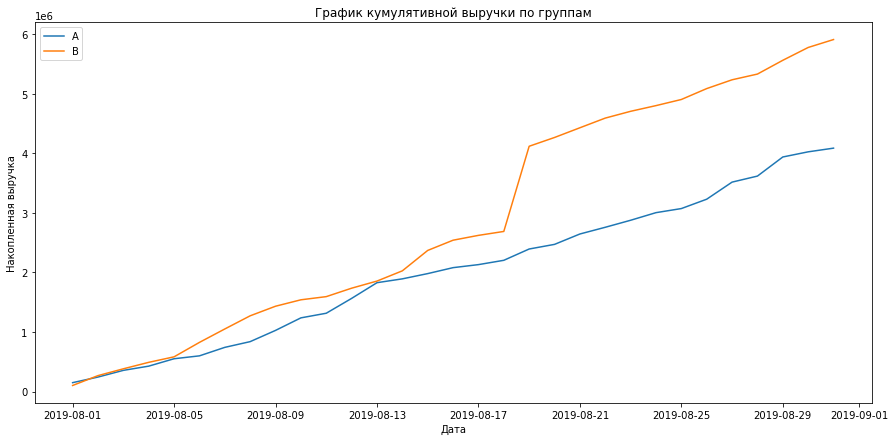

In [38]:
plt.figure(figsize=(15, 7))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.title('График кумулятивной выручки по группам')
plt.xlabel('Дата')
plt.ylabel('Накопленная выручка')
plt.legend() 
plt.show()

Значения выручки растут на протяжении всего теста для группы А и группы В. К концу теста виден значительный разрыв в выручке между группой А и группой В. При этом в раойне 18-20 августа у группы В заметен резкий скачок выручки. Это может быть связанно с аномальным кол-ом заказов в эти дни, либо экстремально высокой выручкой

#### Строим график кумулятивного среднего чека по группам

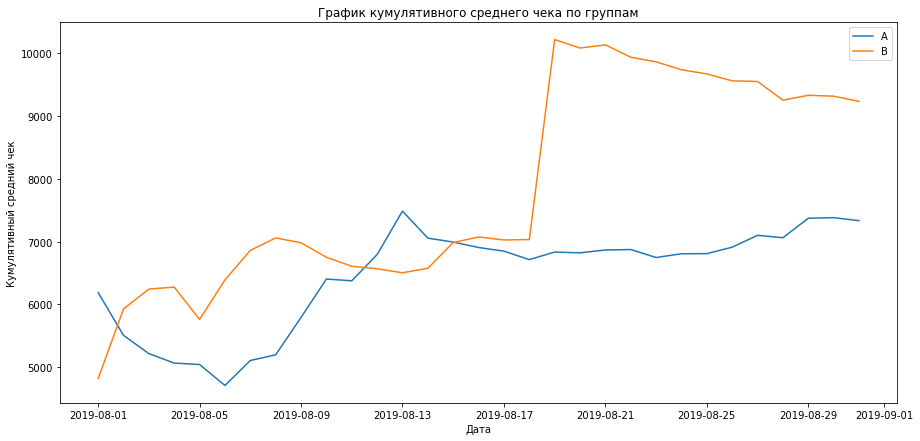

In [39]:
plt.figure(figsize=(15, 7))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')

plt.title('График кумулятивного среднего чека по группам')
plt.xlabel('Дата')
plt.ylabel('Кумулятивный средний чек')
plt.legend() 
plt.show()

К концу периода теста виден значительный разрыв в среднем чеке между группой А и группой В. В раойне 18-20 августа у группы В заметен резкий скачок среднего чека, который после всплеска плавно начинает снижаться, что может говорить о нисходящем тренде.  Всплеск средной выручки может быть связанн с аномальными кол-ом заказов в эти дни, либо экстремально высокой выручкой

#### Строим график относительного изменения кумулятивного среднего чека группы B к группе A

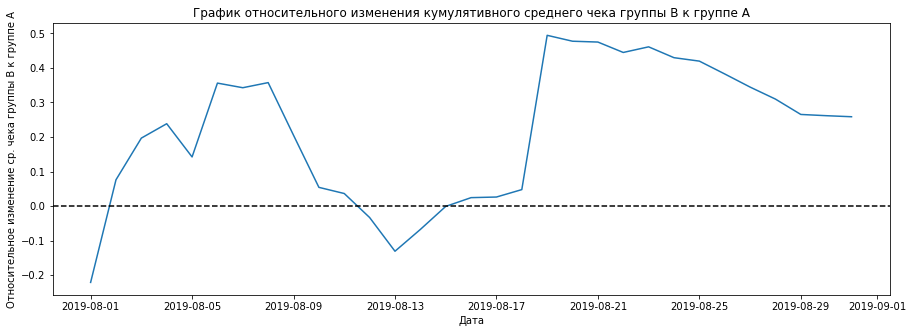

In [40]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(15, 5))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.axhline(y=0, color='black', linestyle='--') 
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Относительное изменение ср. чека группы В к группе А')
plt.show()

На графике относительного изменения кумулятивного среднего чека группы B к группе A также виден аномальный всплеск в районе 18-20 августа. Помимо этого, обращается на себя внимание факт того, что в середине теста средние значения чека группы В были ниже, чем у группы А, а также понижательный тренд к концу теста

#### Строим график кумулятивного среднего количества заказов на посетителя по группам

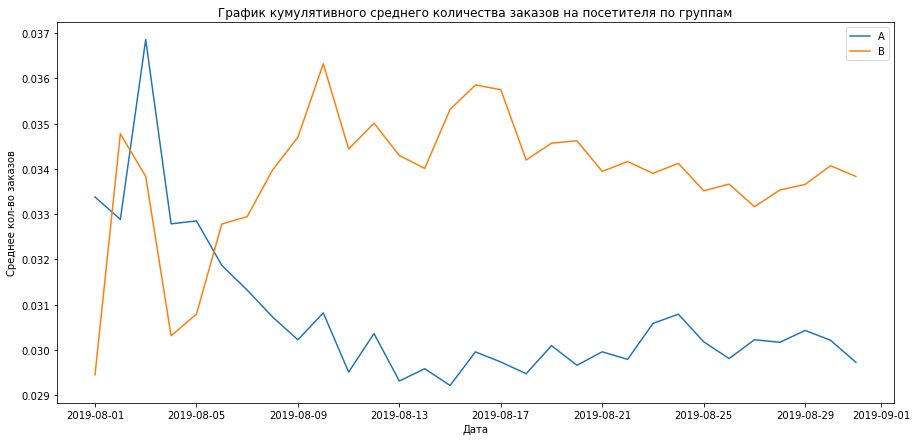

In [41]:
cumulativeOrderA = cumulativeData[cumulativeData['group']=='A'][['date','visitors', 'orders']]
cumulativeOrderB = cumulativeData[cumulativeData['group']=='B'][['date','visitors', 'orders']]

plt.figure(figsize=(15, 7))
plt.plot(cumulativeOrderA['date'], cumulativeOrderA['orders']/cumulativeOrderA['visitors'], label='A')
plt.plot(cumulativeOrderB['date'], cumulativeOrderB['orders']/cumulativeOrderB['visitors'], label='B')

plt.title('График кумулятивного среднего количества заказов на посетителя по группам')
plt.xlabel('Дата')
plt.ylabel('Среднее кол-во заказов')
plt.legend() 
plt.show()

График кумулятивного среднего количества заказов на посетителя по группам показывает, что на одного посетителя в группе В приходилось больше заказов на протяении практически всего теста. В абсолютных величинах разница может показаться не очень большой, однако в относительных на первый взгляд велика

#### Строим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A

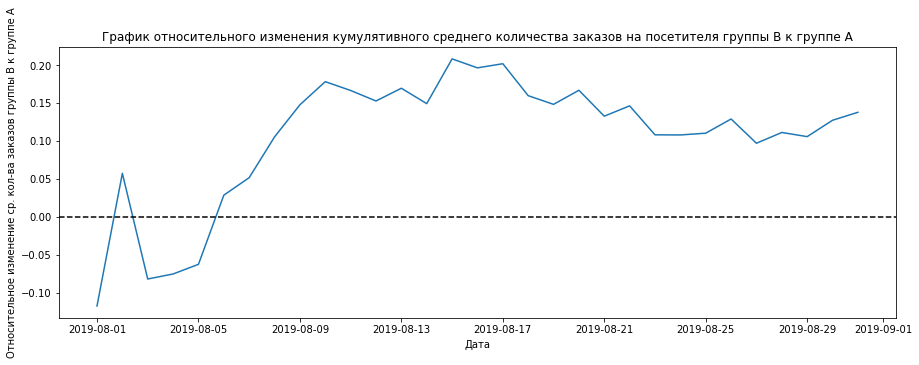

In [42]:
mergedCumulativeOrders = cumulativeOrderA.merge(cumulativeOrderB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(15, 5))
plt.plot(mergedCumulativeOrders['date'], (mergedCumulativeOrders['ordersB']/mergedCumulativeOrders['visitorsB'])/(mergedCumulativeOrders['ordersA']/mergedCumulativeOrders['visitorsA'])-1)
plt.axhline(y=0, color='black', linestyle='--') 
plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Относительное изменение ср. кол-ва заказов группы В к группе А')
plt.show()

График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A подтверждает данные из предыдущего графика. После небольшого провала в начале, среднее кол-во заказов на посетителя в группе В выше, чем в группе А на протяжении практически всего теста и колеблится в диапазоне от 0,10 до 0,20. Тем не менее разница в абсолютных цифрах не так велика, поэтому на основании данных графиков рано делать выводы о статичестиски значимых результатах

## Анализ аномалий в данных <a id="anomaly"></a> 

#### Строим точечный график количества заказов по пользователям

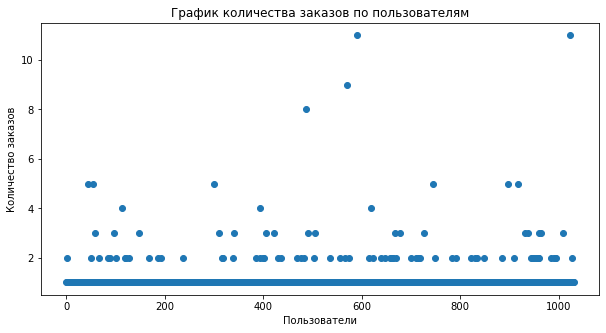

In [43]:
x_values = pd.Series(range(0,len(ordersByUsers)))
plt.figure(figsize=(10,5))
plt.scatter(x_values, ordersByUsers['orders']) 
plt.title('График количества заказов по пользователям')
plt.xlabel('Пользователи')
plt.ylabel('Количество заказов')
plt.show()

Как видно из графика, большинство пользователей ограничиваются 1-2 заказами, однако у некоторых пользователь количество заказов больше 5. Такое большое колчество заказов у некоторых пользователей может значительно влиять на итоговый результат. Имеет смысл избавиться от аномальных значений

#### Посчитаем 95-й и 99-й перцентили количества заказов на пользователя и выберем границу для определения аномальных заказов

In [44]:
np.percentile(ordersByUsers['orders'], [95, 99])

array([2., 4.])

<div style="border:solid Gold; padding: 40px">
95% пользователей имеют не более 2 заказов, а 99% не более четырёх. В дальнейшем ограничим нашу выборку 4-мя заказами, посчитав остальные аномально высокими. 

#### Строим точечный график стоимостей заказов

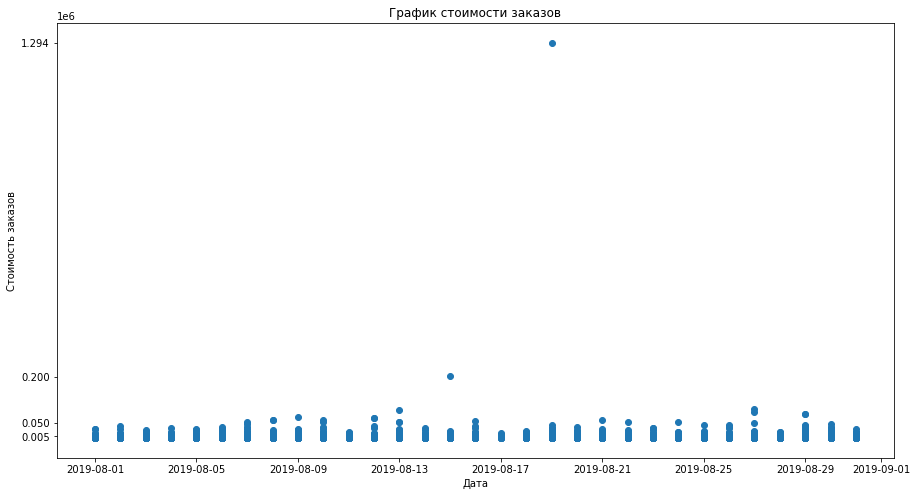

In [45]:
x_values = pd.Series(range(0,len(ordersByUsers)))
plt.figure(figsize=(15,8))
plt.scatter(orders['date'], orders['revenue']) 
plt.title('График стоимости заказов')
plt.xlabel('Дата')
plt.yticks([1294500, 200000, 50000, 5000])
plt.ylabel('Стоимость заказов')
plt.show()

Из графика явно следует, что заказы более 200 т.р. имеют аномальную природу

In [46]:
orders['revenue'].sort_values(ascending=False)

425     1294500
1196     202740
858       93940
1136      92550
744       86620
         ...   
933          60
459          50
756          50
584          50
1091         50
Name: revenue, Length: 1197, dtype: int64

#### Посчитаем 95-й и 99-й перцентили стоимости заказов и выберем границу для определения аномальных заказов

In [47]:
np.percentile(orders['revenue'], [95, 99])

array([28000. , 58233.2])

<div style="border:solid Gold; padding: 40px">
99% заказов приходятся на сумму менее 58 т.р. Ограничим в дальнейшем нашу выборку этой суммой.

## Расчёт статистической значимости по «сырым» данным <a id="raw_stat"></a> 


#### Посчитаем различия в среднем количестве заказов на посетителя между группами 

*Сформулируем гипотезы:*
    
Нулевая гипотеза (Н0) - различия в среднем количестве заказов между группами отсутствуют.  
Альтернативная гипотеза (Н1) - различия в среднем количестве заказов между группами присутствуют.

Ввиду имеющихся выбросов и ненормальность распределения данных, применим непараметрический тест Манна-Уитни.  
Уровень статистической значимости alpha установим 0.05.

In [48]:
# для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов. 
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders'] 

# укажем количество визитов для каждой группы на каждую дату
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsBDaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

In [49]:
# формируем выборки
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(visitorsADaily['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(visitorsBDaily['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

alpha = 0.05
raw_orders_stat = stats.mannwhitneyu(sampleA, sampleB)[1]
print("p-value составляет {0:.3f}".format(raw_orders_stat)) 
if raw_orders_stat < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'
    ) 
# считаем относительный прирост среднего числа заказов группы B
raw_relative_orders_stat = sampleB.mean() / sampleA.mean() - 1
print("Относительный припрост среднего числа заказов группы В к группе А составляет {0:.3f}".format(raw_relative_orders_stat))

p-value составляет 0.011
Отвергаем нулевую гипотезу: разница статистически значима
Относительный припрост среднего числа заказов группы В к группе А составляет 0.149


<div style="border:solid Gold; padding: 40px">

Значение p_value меньше 0.05, значит отклоняем нулевую гипотезу, утверждающую, что статистически значимых различий между количеством заказов на посетителя между группами нету. С высокой долей вероятности такие различия существуют.

При этом прирост среднего числа заказов группы В относительно группы А составляет почти 15%

#### Посчитаем статистическую значимость различий в среднем чеке заказа между группами

*Сформулируем гипотезы:*   
    
Нулевая гипотеза (Н0) - различия в среднем чеке между группами отсутствуют  
Альтернативная гипотеза (Н1) - различия в среднем чеке между группами присутствуют

Ввиду имеющихся выбросов и ненормальность распределения данных, применим непараметрический тест Манна-Уитни.  
Уровень статистической значимости alpha установим 0.05.

In [50]:
alpha = 0.05
raw_revenue_stat = stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]
print('p-value составляет {0:.3f}'.format(raw_revenue_stat))

if raw_revenue_stat < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя')

print('Относительный припрост среднего чека группы В к группе А составляет {0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

p-value составляет 0.729
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя
Относительный припрост среднего чека группы В к группе А составляет 0.259


<div style="border:solid Gold; padding: 40px">

Значение p_value значительно больше 0.05 (критического уровня статистической значимости), соответственно у нас нет достаточно оснований отклонить нулевую гипотезу. Статически значимые отличия в среднем чеке между группами отсутствуют.  

 При этом средний чек группы В значительно (почти 26%) выше, чем в группе А

## Расчёт статистической значимости по «очищенным» данным <a id="filt_stat"></a> 

#### Очистка данных

In [51]:
order_percentile = np.percentile(ordersByUsers['orders'], 99)
revenue_percentile = np.percentile(orders['revenue'], 99)

usersWithManyOrders = ordersByUsers[ordersByUsers['orders'] > order_percentile]['visitorId']

usersWithExpensiveOrders = orders[orders['revenue'] > revenue_percentile]['visitorId']

abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
   .sort_values())

print(abnormalUsers.shape[0]) 

21


Всего из исходных данных будет исключён 21 пользователь, для которых были обнаружены аномальные данные в количестве заказов или выручке

In [52]:
# исключяем "аномальных" пользователей для того, чтобы построить графики для отфильтрофанных данных
Forders = orders.query('visitorId not in @abnormalUsers')
FdatesGroups = Forders[['date','group']].drop_duplicates() 
FordersAggregated = datesGroups.apply(lambda x: Forders[np.logical_and(Forders['date'] <= x['date'], Forders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])
FvisitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])
FcumulativeData = FordersAggregated.merge(FvisitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
FcumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
FcumulativeRevenueA = FcumulativeData[FcumulativeData['group']=='A'][['date','revenue', 'orders']]
FcumulativeRevenueB = FcumulativeData[FcumulativeData['group']=='B'][['date','revenue', 'orders']]
FcumulativeOrderA = FcumulativeData[FcumulativeData['group']=='A'][['date','visitors', 'orders']]
FcumulativeOrderB = FcumulativeData[FcumulativeData['group']=='B'][['date','visitors', 'orders']]


#### Строим график кумулятивной выручки по группам по отфильтрованным данным

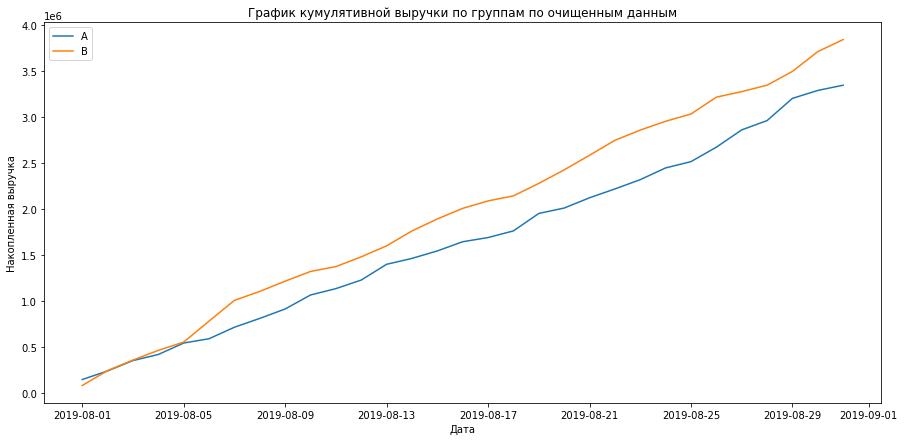

In [53]:
plt.figure(figsize=(15, 7))
plt.plot(FcumulativeRevenueA['date'], FcumulativeRevenueA['revenue'], label='A')
plt.plot(FcumulativeRevenueB['date'], FcumulativeRevenueB['revenue'], label='B')
plt.title('График кумулятивной выручки по группам по очищенным данным')
plt.xlabel('Дата')
plt.ylabel('Накопленная выручка')
plt.legend() 
plt.show()

После фильтрации аномальных значений заметно "сглаживание" графика кумулятивной выручки

#### Строим график относительного изменения кумулятивного среднего чека по группам по отфильтрованным данным

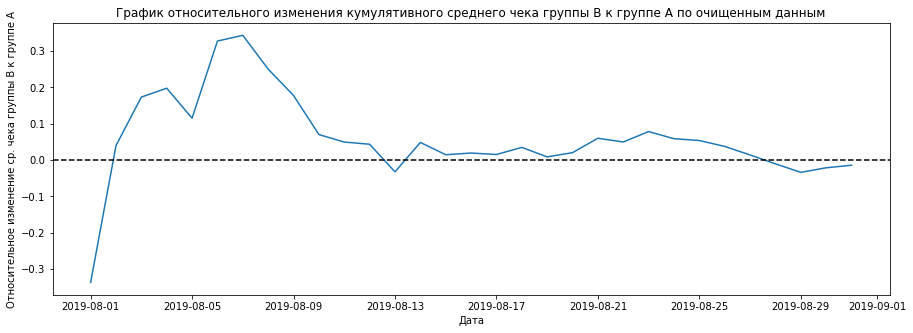

In [54]:
FmergedCumulativeRevenue = FcumulativeRevenueA.merge(FcumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(15, 5))
plt.plot(FmergedCumulativeRevenue['date'], (FmergedCumulativeRevenue['revenueB']/FmergedCumulativeRevenue['ordersB'])/(FmergedCumulativeRevenue['revenueA']/FmergedCumulativeRevenue['ordersA'])-1)
plt.axhline(y=0, color='black', linestyle='--') 
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A по очищенным данным')
plt.xlabel('Дата')
plt.ylabel('Относительное изменение ср. чека группы В к группе А')
plt.show()

График отосительного изменения кумулятивного среднего чека группы В к группе А также подвергся серьезному изменению после фильтрации данных. Судя по нему значительных отличий в среднем чеке между группами нет

#### Строим график относительного изменения кумулятивного среднего количества заказов на посетителя по группам по отфильтрованным данным

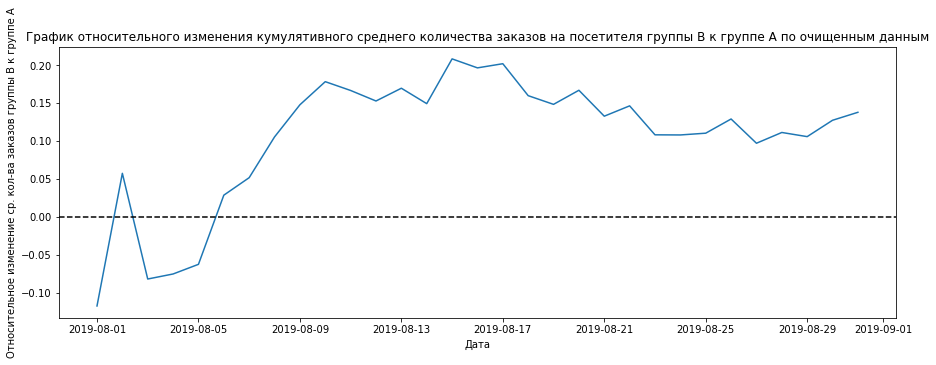

In [55]:
FmergedCumulativeOrders = cumulativeOrderA.merge(cumulativeOrderB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(15, 5))
plt.plot(FmergedCumulativeOrders['date'], (FmergedCumulativeOrders['ordersB']/FmergedCumulativeOrders['visitorsB'])/(FmergedCumulativeOrders['ordersA']/FmergedCumulativeOrders['visitorsA'])-1)
plt.axhline(y=0, color='black', linestyle='--') 
plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A по очищенным данным')
plt.xlabel('Дата')
plt.ylabel('Относительное изменение ср. кол-ва заказов группы В к группе А')
plt.show()

После фильтрации данных график относительного изменения кумулятивного среднего количества заказов на посетителя группы В к группе А не сильно изменился. По прежнему отчётливо видно, что в группе В среднее количество заказов на протяжении почти всего теста больше, чем в группе А

#### Посчитаем различия в среднем количестве заказов на посетителя между группами (по очищенным данным)

In [56]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitorsADaily['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitorsBDaily['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

In [57]:
# критический уровень статистической значимости alpha принимаем равным 0.05

alpha = 0.05

filtred_orders_stat = stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]

print("p-value составляет {0:.3f}".format(filtred_orders_stat)) 

if filtred_orders_stat < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя')
                                                           
print('Относительный припрост среднего количества заказов на посетителя группы В к группе А составляет {0:.3f}'.format(sampleBFiltered.mean() / sampleAFiltered.mean() - 1)) 


p-value составляет 0.009
Отвергаем нулевую гипотезу: разница статистически значима
Относительный припрост среднего количества заказов на посетителя группы В к группе А составляет 0.165


<div style="border:solid Gold; padding: 40px">

После очистки данных значение p_value по прежнему меньше 0.05 (даже несколько снизилось), значит имеет основания для отклонения нулевой гипотезы. Статистически значимые отличия в числе заказов между группами существуют.

При этом относительные различия между группой В и А после фильтрации данных незначительно выросли.

#### Посчитаем статистическую значимость различий в среднем чеке заказа между группами (по очищенным данным)

In [58]:
filtred_revenue_stat = stats.mannwhitneyu(orders[np.logical_and(orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),)]['revenue'],
                orders[np.logical_and(orders['group'] == 'B',np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )]['revenue'],)[1]

print('p-value составляет {0:.3f}'.format(filtred_revenue_stat))

if filtred_revenue_stat < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя')

print("Относительный припрост среднего количества заказов на посетителя группы В к группе А составляет {0:.3f}".format(orders[np.logical_and(orders['group'] == 'B',
            np.logical_not(orders['visitorId'].isin(abnormalUsers)),)]['revenue'].
            mean()/ orders[np.logical_and(orders['group'] == 'A',np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )]['revenue'].mean()- 1)) 

p-value составляет 0.958
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя
Относительный припрост среднего количества заказов на посетителя группы В к группе А составляет -0.014


<div style="border:solid Gold; padding: 40px">

После очистки данных значение p_value по прежнему значительно больше 0.05 и даже выросло. Соответственно у нас нет достаточно оснований отклонить нулевую гипотезу. Статически значимые отличия в среднем чеке между группами отсутствуют.  

При этом относительные различия между группой В и А после фильтрации данных сильно изменились. Вместо большого перевеса (26%) у группы В мы наблюдаем практически одинаковые значения среднего чека (-1%)

<div style="border:solid Gold; padding: 40px">
    
## Общие выводы  <a id="conclusion"></a> 
    
**1) Приоритезация гипотез**
    
Исследовав представленные гипотезы двумя методами ICE и RICE, можно сделать вывод, что параметр reach (охват аудитории) значительно влияет на конечный результат. Наиболее перспективной (с двухкратным отрывом от конкруентов) из представленных является гипотеза №7 "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок". Будучи задачей средней сложности по реализумости, её осуществление по предварительным данным должно увеличить прибыль компании. 
    
**2) Анализ А/B теста**
    
На основании проведенного анализа А/В тестирования, мы получили следующие результаты:
1. Как на "сырых", так и на очищенных данных присутствует статистически значимое различие в числе заказов между группами. 
2. Как на "сырых", так и на очищенных данных статистически значимых различий между группама по среднему чеку не обнаружено.
3. "Очищенный" график различия среднего количества заказов между группами показывает, что результаты группы B вначале теста были хуже группы A, однако уже в первой трети теста наметилась тенденция к улучшению результатов группы В. В итоге резульатты группы В превзошли результаты группы А практически на протяжении всего теста. Отмечаем, что подобный результат наблюдался и на неотфильтрованных данных.
4. "Очищенный" график различия среднего чека показывает, что после некоторых колебаний вначале теста, график стабилизировался у нейтрального (0) значения, что говорит об отсутствии значимых различий в среднем чеке между группами. Отметим, что до фильтрации данных можно было наблюдать значительное превосходство группы В по среднему чеку, но это из-за аномальных единичных покупок на большую сумму.

Исходя из полученных результатов принимаем следующее решение:  
**Остановить тест, признав его успешным.**

Данное решение обусловленно наличим статистически значимых различий между группами по числу заказов. Несмотря на то, что средний чек не изменился, факт наличия увеличения числа заказов говорит о целесообразности внедрения протестированных измененний.